In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn

In [5]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
'''left=df[df.left==1]
retained=df[df.left==0]'''

'left=df[df.left==1]\nretained=df[df.left==0]'

In [7]:
'''len(left)
print(f"number of employees that left are {len(left)}, and those who were retained are {len(retained)}")'''

'len(left)\nprint(f"number of employees that left are {len(left)}, and those who were retained are {len(retained)}")'

In [8]:
import seaborn as sns

AttributeError: 'numpy.int64' object has no attribute 'startswith'

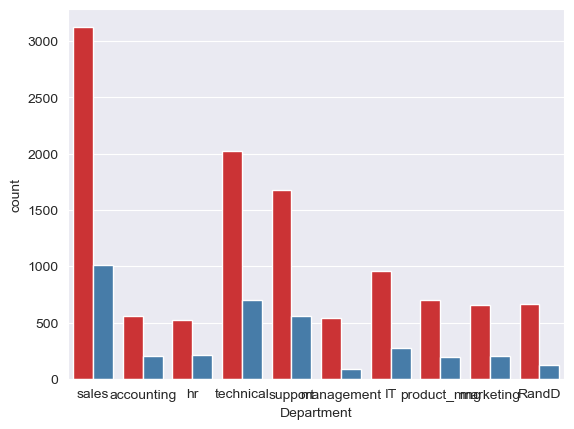

In [9]:
sns.countplot(x='Department', hue='left', data=df, palette='Set1')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

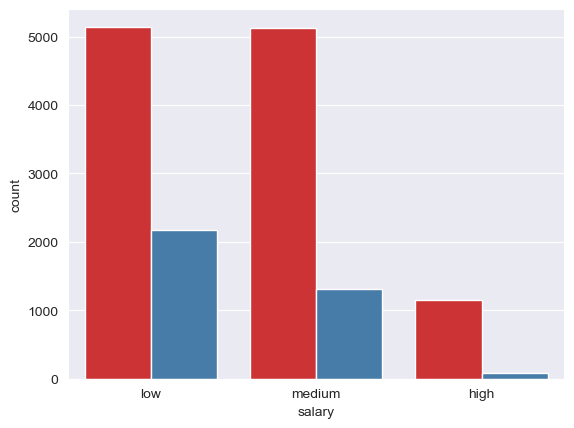

In [10]:
sns.countplot(x='salary', hue='left', data=df, palette='Set1')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

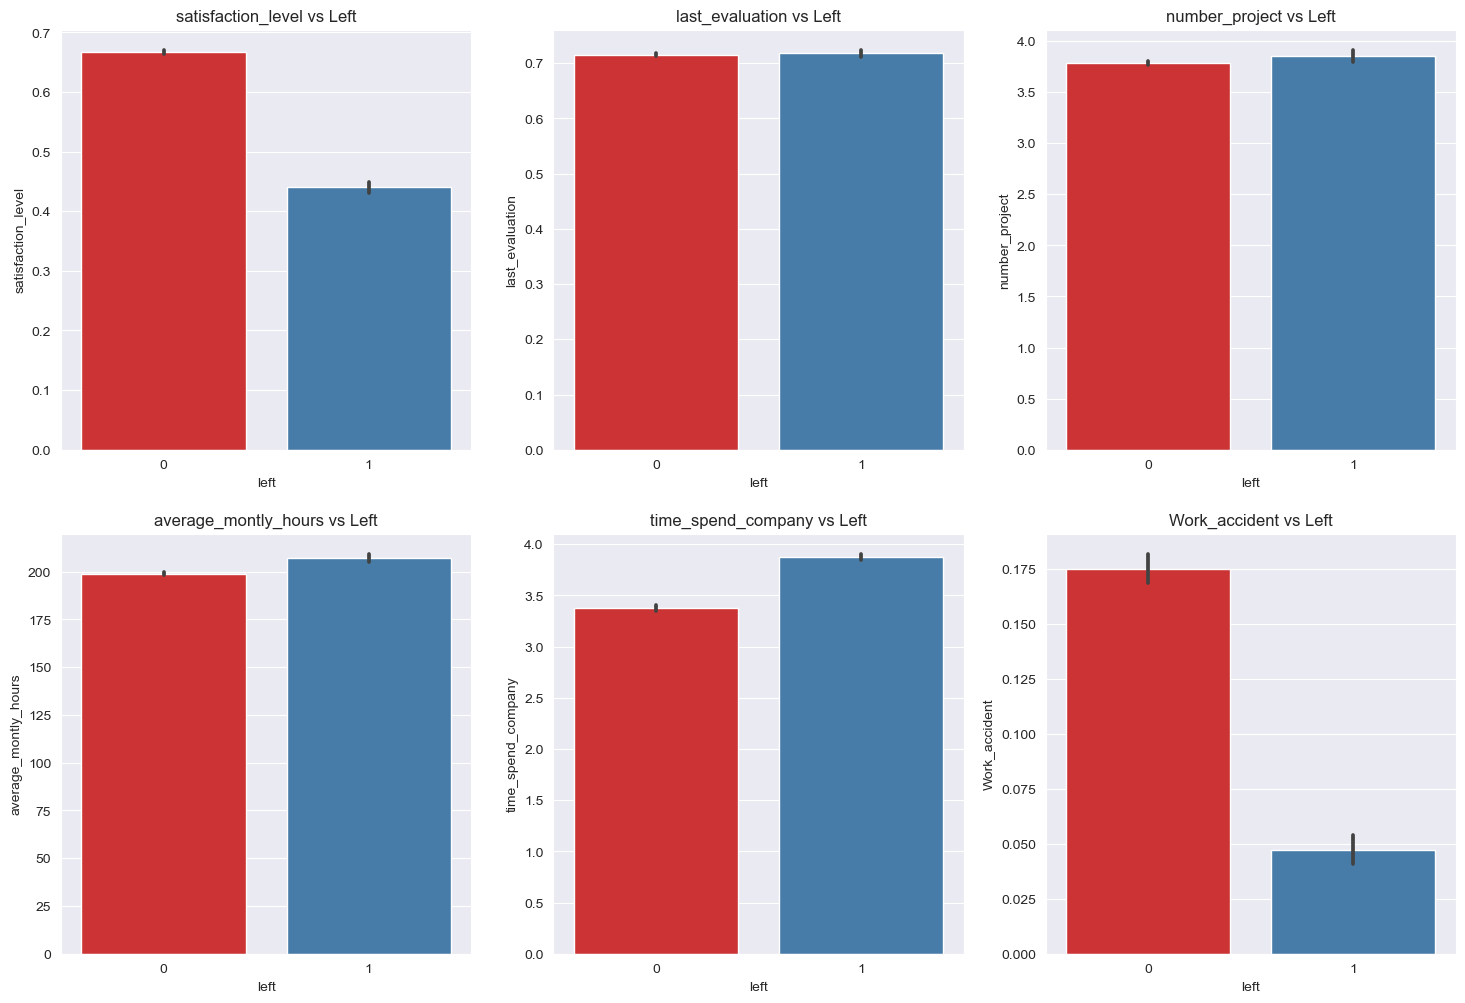

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.barplot(ax=axes[row, col], x='left', y=feature, data=df, palette='Set1')
    axes[row, col].set_title(f'{feature} vs Left')

plt.tight_layout()
plt.show()

In [12]:
#we can see that salary, Department,satisfaction_level and work accident affect our outcome, others do not have much significant impact

In [13]:
selected_features = ['salary','satisfaction_level', 'Work_accident', 'Department']

In [14]:
X=df[selected_features]
X

,salary,satisfaction_level,Work_accident,Department
0,low,0.38,0,sales
1,medium,0.80,0,sales
2,medium,0.11,0,sales
3,low,0.72,0,sales
4,low,0.37,0,sales
...,...,...,...,...
14994,low,0.40,0,support
14995,low,0.37,0,support
14996,low,0.37,0,support
14997,low,0.11,0,support


In [15]:
X_encoded= pd.get_dummies(X, columns=['Department', 'salary','Work_accident'],drop_first=True)


In [16]:
X_encoded

,satisfaction_level,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Work_accident_1
0,0.38,False,False,False,False,False,False,True,False,False,True,False,False
1,0.80,False,False,False,False,False,False,True,False,False,False,True,False
2,0.11,False,False,False,False,False,False,True,False,False,False,True,False
3,0.72,False,False,False,False,False,False,True,False,False,True,False,False
4,0.37,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,False,False,False,False,False,False,False,True,False,True,False,False
14995,0.37,False,False,False,False,False,False,False,True,False,True,False,False
14996,0.37,False,False,False,False,False,False,False,True,False,True,False,False
14997,0.11,False,False,False,False,False,False,False,True,False,True,False,False


In [17]:
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'bool':
        X_encoded[column] = X_encoded[column].astype(int)

In [18]:
X_encoded

,satisfaction_level,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Work_accident_1
0,0.38,0,0,0,0,0,0,1,0,0,1,0,0
1,0.80,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0,0,0,0,0,0,1,0,0,0,1,0
3,0.72,0,0,0,0,0,0,1,0,0,1,0,0
4,0.37,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0,0,0,0,0,0,0,1,0,1,0,0
14995,0.37,0,0,0,0,0,0,0,1,0,1,0,0
14996,0.37,0,0,0,0,0,0,0,1,0,1,0,0
14997,0.11,0,0,0,0,0,0,0,1,0,1,0,0


In [19]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [71]:
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred=model.predict(X_test)

In [73]:
model.score(X_test,y_test)

0.784

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [84]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      2294
           1       0.58      0.29      0.39       706

    accuracy                           0.78      3000
   macro avg       0.70      0.61      0.63      3000
weighted avg       0.76      0.78      0.76      3000
